## Overview

This Jupyter notebook focuses on training a machine learning model to predict house prices. We utilize preprocessed data from the "House_Sales_Preprocessing.ipynb" notebook. The dataset used in this analysis contains real estate listings in the US broken by State and zip code, downloaded from https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [10]:
df = pd.read_csv('Preprocessed_Data.csv')
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,11.561725
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,11.289794
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,11.112463
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,11.884496
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,1200.0,11.082158


In [11]:
# Apply one-hot encoding
df = pd.get_dummies(df, columns=['status'])
df = pd.get_dummies(df, columns=['city'])
df = pd.get_dummies(df, columns=['state'])

#Features and Target variable
X = df.drop(['price'], axis=1)
y = df['price']
print(f"X shape: {X.shape}, y shape: {y.shape}")

#Splitting the Dataset for Training and Testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X shape: (70708, 2051), y shape: (70708,)
X_train shape: (56566, 2051), y_train shape: (56566,)
X_test shape: (14142, 2051), y_test shape: (14142,)


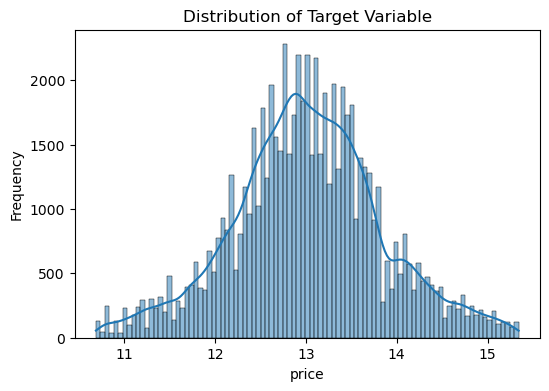

In [12]:
#Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.histplot(df['price'], kde=True)
plt.title(f'Distribution of Target Variable')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Random Forest Model

In [15]:
# Model Training 
model = RandomForestRegressor(random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)


In [16]:
# Model Evaluation
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Training set metrics:')
print(f'Mean Squared Error: {train_mse}')
print(f'Mean Absolute Error: {train_mae}')
print(f'R-squared: {train_r2}')

print('\nTesting set metrics:')
print(f'Mean Squared Error: {test_mse}')
print(f'Mean Absolute Error: {test_mae}')
print(f'R-squared: {test_r2}')

Training set metrics:
Mean Squared Error: 0.029520658043956614
Mean Absolute Error: 0.11098850600478206
R-squared: 0.9569679789131845

Testing set metrics:
Mean Squared Error: 0.14627507224254474
Mean Absolute Error: 0.25965653621456636
R-squared: 0.788103878661833


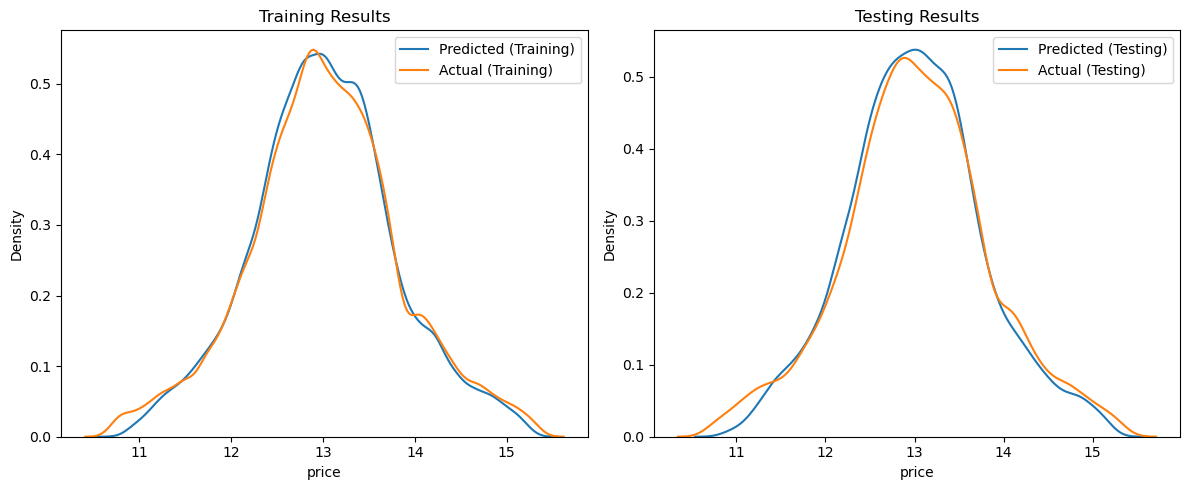

In [17]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.kdeplot(data=y_train_pred, label="Predicted (Training)")
sns.kdeplot(data=y_train, label="Actual (Training)")
plt.title("Training Results")
plt.legend()

plt.subplot(1, 2, 2)
sns.kdeplot(data=y_test_pred, label="Predicted (Testing)")
sns.kdeplot(data=y_test, label="Actual (Testing)")
plt.title("Testing Results")
plt.legend()

plt.tight_layout()
plt.show()